In [10]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import nbformat as nbf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
pio.renderers.default = "browser"

In [11]:
df = pd.read_csv("../data/skin_cancer_dataset.csv")[["age", "sex"]]
df = df[df["sex"] != "unknown"]
df.dropna(inplace=True)
df["age"] = df["age"].astype(int)
df

,age,sex
0,80,male
1,80,male
2,80,male
3,80,male
4,75,male
...,...,...
10010,40,male
10011,40,male
10012,40,male
10013,80,male


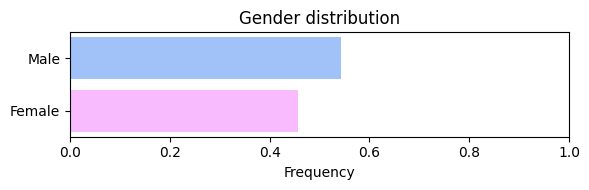

In [12]:
col = "sex"
serie = df[col].value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)
# sns.set_color_codes("pastel")
# sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
# plt.xlabel('')
# plt.ylabel('')
# plt.xlim(0, 1.0)
# plt.tight_layout()
# plt.title(col)
# plt.show()

# Matplotlib equivalente al grafico seaborn precedente
fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
labels = list(serie.index)
values = list(serie.values)
y_pos = np.arange(len(labels))

# palette pastel
# cmap = plt.get_cmap("Pastel2")
colors = ["#4287f5", "#f279fc"]

bars = ax.barh(y_pos, values, color=colors, alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(["Male", "Female"])
ax.invert_yaxis()  # mantengo ordine simile a seaborn
ax.set_xlabel("Frequency")
ax.set_ylabel("")
ax.set_xlim(0, 1.0)
ax.set_title("Gender distribution")
plt.tight_layout()
plt.savefig(f"../outputs/skin/skin_{col}_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

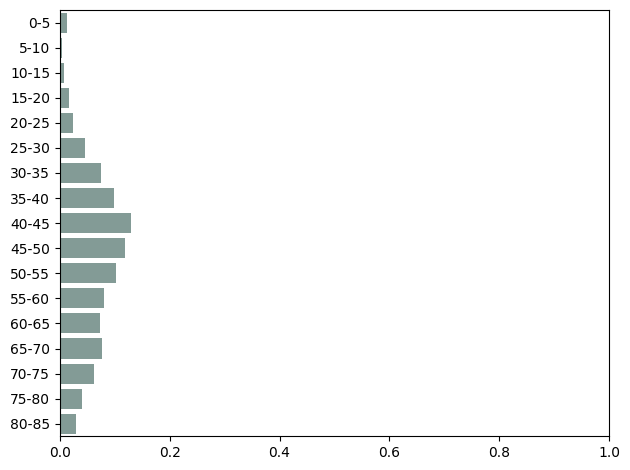

In [13]:
max_age = df["age"].max()
min_age = df["age"].min() 


range_df = df["age"].value_counts(bins=17, normalize=True).sort_index()
range_df.index = [f"{int(np.ceil(iv.left))}-{int(iv.right)}" for iv in range_df.index]
sns.set_color_codes("pastel")
sns.barplot(x= range_df.values, y= [str(x) for x in range_df.index], orient='h', color="#014034")
plt.xlabel('')  
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
ax = plt.gca()
for patch in ax.patches:
    patch.set_alpha(0.5)
plt.tight_layout()
# plt.savefig("../outputs/skin/skin_{col}_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

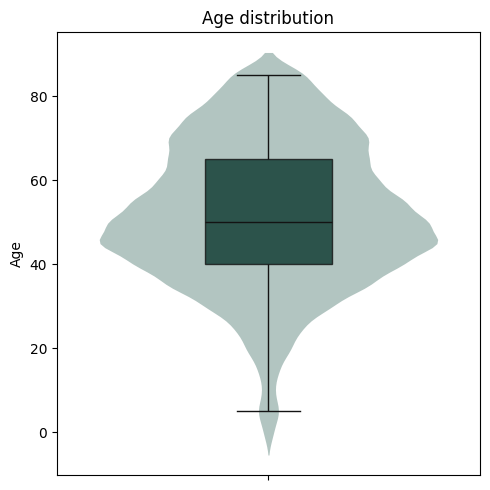

In [14]:
col = "age"
color = '#014034'

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 

vp = sns.violinplot(data=df[col], color=color,
                    inner=None, linewidth=0, saturation=1, ax=ax)

for patch in vp.collections:
    patch.set_alpha(0.3)  

bp = sns.boxplot(data=df[col], color=color, width=0.3,
                    boxprops={'zorder': 2}, saturation=0.7, ax=ax, showfliers=False)

for patch in bp.patches:
    patch.set_alpha(0.8)

ax.set_ylabel('Age')  
ax.set_title('Age distribution') 

plt.tight_layout()
plt.savefig(f"../outputs/skin/skin_{col}_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

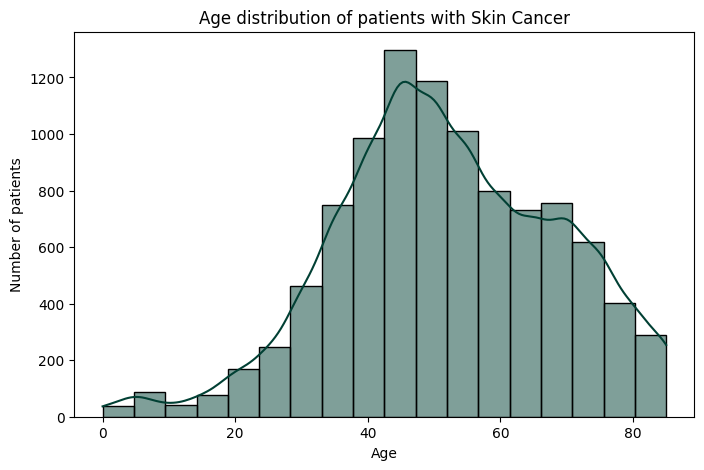

In [15]:
colors = (1/255,64/255,52/255)
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=18, kde=True, color=colors, edgecolor='black')
plt.title("Age distribution of patients with Skin Cancer")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.savefig(f"../outputs/skin/skin_{col}_hist_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
df = pd.read_csv("../data/skin_cancer_dataset.csv")[["localization"]]
df = df[df["localization"] != "unknown"]
df

,localization
0,scalp
1,scalp
2,scalp
3,scalp
4,ear
...,...
10010,abdomen
10011,abdomen
10012,abdomen
10013,face


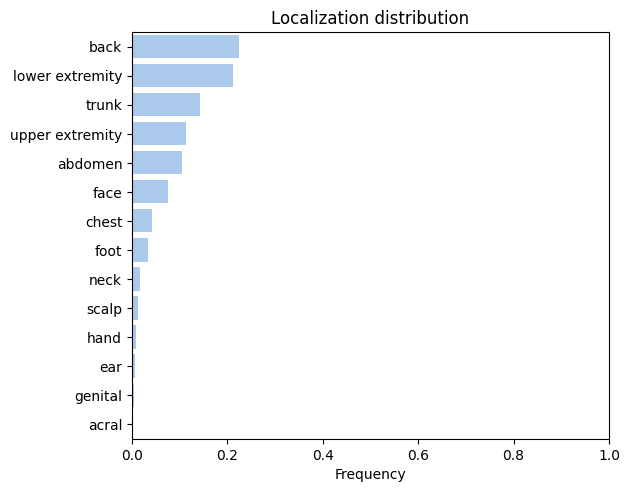

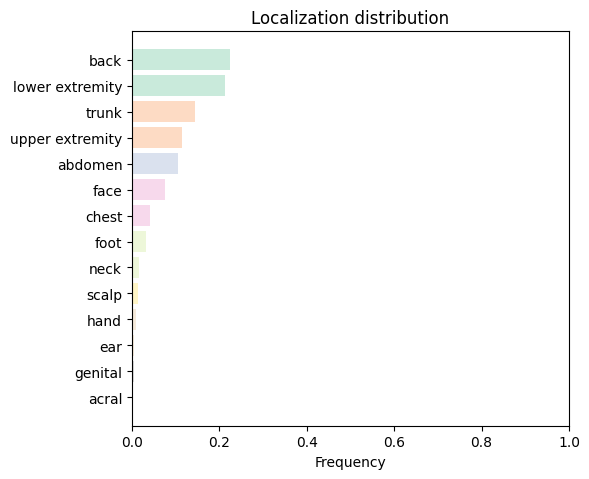

In [17]:
col = "localization"
serie = df[col].value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
plt.xlabel('Frequency')
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.title("Localization distribution")
plt.show()

# Matplotlib equivalente al grafico seaborn precedente
fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
labels = list(serie.index)
values = list(serie.values)
y_pos = np.arange(len(labels))

# palette pastel
cmap = plt.get_cmap("Pastel2")
colors = [cmap(i / max(1, len(labels) - 1)) for i in range(len(labels))]

bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # mantengo ordine simile a seaborn
ax.set_xlabel("Frequency")
ax.set_ylabel("")
ax.set_xlim(0, 1.0)
ax.set_title("Localization distribution")
plt.tight_layout()
plt.savefig(f"../outputs/skin/skin_{col}_distribution.png", dpi=300, bbox_inches='tight')
plt.show()